In [50]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [51]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Text(0, 0.5, 'Percentage Score')

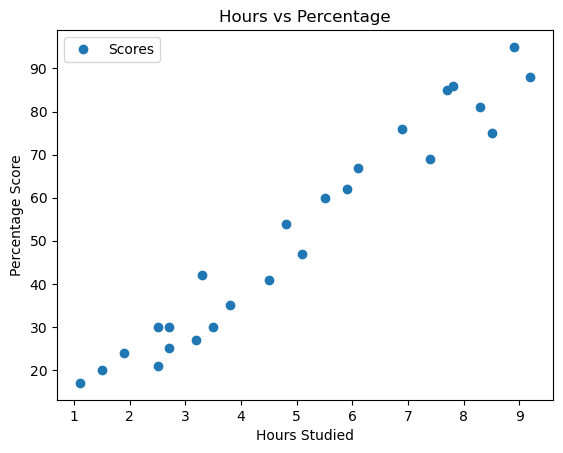

In [52]:
df.plot(x = "Hours", y = "Scores", style = 'o')
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  

In [53]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

In [54]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

In [55]:
from sklearn.linear_model import LinearRegression  
model = LinearRegression()  
model.fit(X_train, y_train) 

LinearRegression()

In [56]:
coefficient = model.coef_

In [57]:
intercept = model.intercept_

In [58]:
points = coefficient * X + intercept
points

array([[26.22489067],
       [53.18126612],
       [33.48237637],
       [88.43191094],
       [36.59272738],
       [15.85705396],
       [95.68939664],
       [57.32840081],
       [86.3583436 ],
       [28.29845801],
       [80.13764157],
       [61.47553549],
       [46.96056409],
       [34.51916004],
       [11.70991927],
       [92.57904562],
       [26.22489067],
       [20.00418864],
       [63.54910283],
       [77.02729056],
       [28.29845801],
       [50.07091511],
       [39.7030784 ],
       [71.8433722 ],
       [81.17442524]])

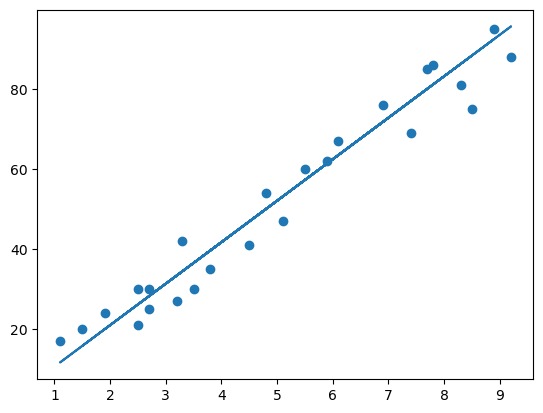

In [59]:
plt.scatter(X, y)
plt.plot(X, points)

In [60]:
y_pred = model.predict(X_test)
y_pred

array([15.85705396, 88.43191094, 26.22489067, 53.18126612, 77.02729056])

In [61]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,15.857054
1,75,88.431911
2,30,26.224891
3,47,53.181266
4,69,77.027291


In [62]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [63]:
print(mse)
print(mae)
print(r2)

62.89542567725755
7.111704597637027
0.8619988027091945


In [64]:
import pickle

with open('percentage.pkl', 'wb') as file:
    pickle.dump(model, file)

# Load the model
with open('percentage.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Test the loaded model
y_pred = loaded_model.predict(X_test)
print(f"Predictions: {y_pred}")

Predictions: [15.85705396 88.43191094 26.22489067 53.18126612 77.02729056]
